## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [3]:
N=1e6
file_name = 'data_000637.txt'
dataN=pd.read_csv(file_name, nrows = N)
dataN

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
999995,1,0,62,3869209011,2560,29
999996,1,0,51,3869209011,2561,12
999997,1,0,61,3869209011,2562,2
999998,1,0,50,3869209011,2563,4


2\. Find out the number of BX in a ORBIT (the value 'x').

In [4]:
x=max(dataN['BX_COUNTER'].values)
x

3563

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [5]:
data=pd.read_csv(file_name)

In [6]:
#time of the first measurement
first=data[['ORBIT_CNT','BX_COUNTER','TDC_MEAS']].values[0]
start_time = first[0]*x*25+first[1]*25+first[2]*25/30
#time of the last measurement
orbits_number=max(data['ORBIT_CNT'].values)
bx_tdc = data[['BX_COUNTER','TDC_MEAS']].values[data['ORBIT_CNT'].values==max(data['ORBIT_CNT'].values)]
bx_number=max(bx_tdc[:,0])
tdc_number=bx_tdc[bx_tdc[:,0]==max(bx_tdc[:,0]),1]
print(orbits_number, bx_number, tdc_number)
end_time = tdc_number*25/30+bx_number*25+orbits_number*25*x
print('Data taking lasted :', (end_time-start_time)*1e-9, 's')

3869211171 769 [0]
Data taking lasted : [0.98014115] s


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [7]:
tdc=data['TDC_MEAS'].values
bx=data['BX_COUNTER'].values
orb=data['ORBIT_CNT'].values
data.insert(6, "ABSOLUTE TIME (ns)",(orb)*x*25+bx*25+tdc*25/30) 
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE TIME (ns)
0,1,0,123,3869200167,2374,26,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.446500e+14
1310716,1,1,4,3869211171,763,11,3.446500e+14
1310717,1,0,64,3869211171,764,0,3.446500e+14
1310718,1,0,139,3869211171,769,0,3.446500e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [8]:
import numpy.random as npr
data.loc[:,'HEAD'] = npr.randint(0,2, size=len(data.values))
data



,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE TIME (ns)
0,0,0,123,3869200167,2374,26,3.446490e+14
1,0,0,124,3869200167,2374,27,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.446500e+14
1310716,0,1,4,3869211171,763,11,3.446500e+14
1310717,0,0,64,3869211171,764,0,3.446500e+14
1310718,1,0,139,3869211171,769,0,3.446500e+14


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [9]:
data1 = data[data['HEAD']==1]


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

(1150000000.0, 1180000000.0)

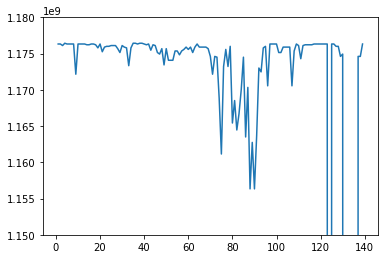

In [10]:
fpga1 = data[data['FPGA']==1]
fpga1
count=[]
obt=[]
offset=min(data['ORBIT_CNT'].values)-1
for ch in range(1,max(fpga1['TDC_CHANNEL'].values+1)):
    obt=fpga1[['ORBIT_CNT','BX_COUNTER','TDC_MEAS','TDC_CHANNEL']].values[fpga1['TDC_CHANNEL'].values==ch]
    #print(max(obt[:,0]),max(obt[:,1]),max(obt[:,2]), np.mean(obt[:,3]))
    if len(obt)!= 0: count.append(max(obt[:,0])*x*30+max(obt[:,1])*30+max(obt[:,2])-(offset)*x*30)
    else: count.append(0)
plt.plot(np.arange(1,max(fpga1['TDC_CHANNEL'].values+1)), count)
plt.ylim(1.15e9,1.18e9)


(1160000000.0, 1180000000.0)

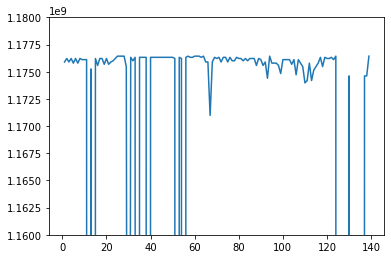

In [11]:
fpga0 = data[data['FPGA']==0]
fpga0
count=[]
obt=[]
for ch in range(1,max(fpga0['TDC_CHANNEL'].values+1)):
    obt=fpga0[['ORBIT_CNT','BX_COUNTER','TDC_MEAS','TDC_CHANNEL']].values[fpga0['TDC_CHANNEL'].values==ch]
    #print(max(obt[:,0]),max(obt[:,1]),max(obt[:,2]), np.mean(obt[:,3]))
    if len(obt)!= 0: count.append(max(obt[:,0])*x*30+max(obt[:,1])*30+max(obt[:,2])-(offset)*x*30)
    else: count.append(0)
plt.plot(np.arange(1,max(fpga0['TDC_CHANNEL'].values+1)), count)
plt.ylim(1.16e9,1.18e9)

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [12]:
#seleziono i dati con orbit_cnt massimo 
orb_max=max(data['ORBIT_CNT'])
data1 = data[data['ORBIT_CNT'].values==orb_max]
#data1
data_group=data1[['TDC_CHANNEL','BX_COUNTER']].groupby(['TDC_CHANNEL']).max()
#data_group
data_sort=data_group.sort_values(by=['BX_COUNTER'], ascending=False)
data_sort

,BX_COUNTER
TDC_CHANNEL,
139,769
64,764
4,763
60,762
61,762
62,762
39,430
35,429
36,427


Most noisy channels are 139, 64 and 4. Information given by 'TDC_MEAS' is not strictly necessary to determine the first three.

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [13]:
data.insert(7, "UNIQUE_COUNT",1) 

In [14]:
data_group=data.groupby(['ORBIT_CNT']).sum()
data_group.sort_values(['UNIQUE_COUNT'])

,HEAD,FPGA,TDC_CHANNEL,BX_COUNTER,TDC_MEAS,ABSOLUTE TIME (ns),UNIQUE_COUNT
ORBIT_CNT,,,,,,,
3869206180,1,0,65,3062,9,3.446495e+14,1
3869204142,0,0,63,3121,15,3.446494e+14,1
3869203571,2,0,127,6808,31,6.892986e+14,2
3869205800,1,0,173,3592,17,6.892990e+14,2
3869205342,1,1,63,8857,41,1.033948e+15,3
...,...,...,...,...,...,...,...
3869206506,144,91,17615,510804,4084,1.051181e+17,305
3869206967,169,86,17762,576385,4420,1.109772e+17,322
3869209661,158,117,17507,542701,4232,1.116666e+17,324


There are 2 unique orbits: from channel 65 and 63.
